In [1]:
import sys
import keras as k
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from matplotlib import pyplot

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
<class 'numpy.ndarray'>
120.70756512369792
64.1500758911213


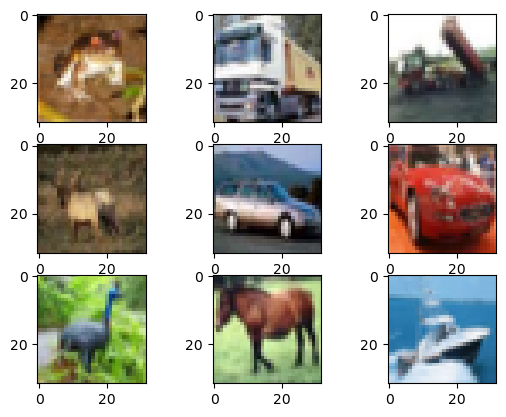

In [2]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
print(type(trainX))
print(trainX.mean())
print(trainX.std())
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [3]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = cifar10.load_data()
 # one hot encode target values
 trainY = k.utils.to_categorical(trainY)
 testY = k.utils.to_categorical(testY)
 return trainX, trainY, testX, testY

In [4]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [ ]:
# scale pixel : normalize and center pixel
def prep_pixels_mean_std(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm - train_norm.mean()
 test_norm = test_norm / train_norm.std()
 # return normalized images
 return train_norm, test_norm

In [5]:
trainX, trainY, testX, testY = load_dataset()
trainX_norm, testX_norm = prep_pixels(trainX, testX)

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
# define basic cnn model
def define_model():
 # example of a 3-block vgg style architecture
 #kernel_regularizer is weight decay regularization
 #padding same pads with zeros
  model = k.Sequential()
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Flatten())
  model.add(k.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(k.layers.Dense(10, activation='softmax'))

  opt = k.optimizers.SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [7]:
# define cnn model with weight decay
def define_model_l2():
 # example of a 3-block vgg style architecture
 #kernel_regularizer is weight decay regularization
 #padding same pads with zeros
  model = k.Sequential()
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=k.regularizers.l2(0.001), input_shape=(32, 32, 3)))
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Flatten())
  model.add(k.layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001)))
  model.add(k.layers.Dense(10, activation='softmax'))

  opt = k.optimizers.SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [8]:
# define cnn model with dropout
def define_model_dropout():
 # example of a 3-block vgg style architecture
 #kernel_regularizer is weight decay regularization
 #padding same pads with zeros
  model = k.Sequential()
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=k.regularizers.l2(0.001), input_shape=(32, 32, 3)))
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Dropout(0.2))
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Dropout(0.3))
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Dropout(0.4))
  model.add(k.layers.Flatten())
  model.add(k.layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001)))
  model.add(k.layers.Dropout(0.5))
  model.add(k.layers.Dense(10, activation='softmax'))

  opt = k.optimizers.SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Nouvelle section

In [9]:
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.tight_layout()
 pyplot.savefig(filename + '_plot.png')
 pyplot.close()


In [ ]:
def define_model_dropout_plus_batch_norm():
 # example of a 3-block vgg style architecture
 #kernel_regularizer is weight decay regularization
 #padding same pads with zeros
  model = k.Sequential()
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=k.regularizers.l2(0.001), input_shape=(32, 32, 3)))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Dropout(0.2))
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Dropout(0.3))
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001), padding='same'))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.MaxPooling2D((2, 2)))
  model.add(k.layers.Dropout(0.4))
  model.add(k.layers.Flatten())
  model.add(k.layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=k.regularizers.l2(0.001)))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Dropout(0.5))
  model.add(k.layers.Dense(10, activation='softmax'))

  opt = k.optimizers.SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [10]:
# run the test harness for evaluating a model
def run_test_harness(data_augmentation=False):
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels_mean_std(trainX, testX)
  # define model
  model = define_model_dropout()
  if data_augmentation:
    # create data generator
    datagen = k.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
  # fit model
  if data_augmentation:
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=0)
  else:
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history)

In [ ]:
# entry point, run the test harness
run_test_harness(True)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-10-071b5f78eea3>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=0)


> 80.610
